# Download and Explore NEON Data

Author: Claire Lunch
Contributor: Bridget Hass

Last Updated: Sept 30, 2025

This tutorial covers downloading NEON data, using the Data Portal and the neonutilities Python package, as well as basic instruction in beginning to explore and work with the downloaded data, including guidance in navigating data documentation. We will explore data of 3 different types, and make a simple figure from each.

### NEON data
There are 3 basic categories of NEON data:1. 

Remote sensing (AOP) - Data collected by the airborne observation platform, e.g. LIDAR, surface reflectan2. ce
Observational (OS) - Data collected by a human in the field, or in an analytical laboratory, e.g. beetle identification, foliar isoto3. pes
Instrumentation (IS) - Data collected by an automated, streaming sensor, e.g.  net radiation, soil carbon dioxide. This category also includes the surface-atmosphere exchange (SAE) data, which are processed and structured in a unique way, distinct from other instrumentation data (see the introductory eddy flux data tutorial for deta
ils).
This lesson covers all three types of data. The download procedures are similar for all types, but data navigation differs significantly by

### Objectives
After completing this activity, you will be able to:- 

Download NEON data using the nuonUtilities packag- e.
Understand downloaNEON ded data sets and load them in or Python for analysis.

Things You’ll Need To Complete This Tutorial
You can fthee R or Python code throughout this tutoio. * For Python users, we recommend using Python

### Required Packages
- `neonutilities`: Basic functions for accessing NEON data- `
rasteri`o: Spatial data package; needed for working with remote sensing data. 3.9+. type.

```python
!pip install neonutilities
!pip install rasterio
```

Import required packages

In [1]:
import neonutilities as nu
import os
import rasterio
from rasterio.plot import show
import pandas as pd
import matplotlib.pyplot as plt

## Download Instrumented (IS) Data
We will start by using `load_by_product` to download some Photosynthetically active radiation (PAR) (DP1.00024.001) data from September-November 2019 at Wind River Experimental Forest (WREF). To learn more about this function, type `nu.load_by_product?` or `help(nu.load_by_product)`.

In [ ]:
nu.load_by_product?

In [2]:
parlist = nu.load_by_product(dpid="DP1.00024.001", 
                site="WREF", 
                startdate="2019-09",
                enddate="2019-11")

Finding available files
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]


Continuing will download 3 NEON DP1.00024.001 files totaling approximately 99.4 MB. Do you want to proceed? (y/n)  y


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.07s/it]
C:\Users\bhass\Documents\GitHubRepos\NEON-utilities-python\src\neonutilities\unzip_and_stack.py:141: UserWarning: Filepaths on Windows are limited to 260 characters. Attempting to extract a filepath that is > 260 characters long. Move your working or savepath directory closer to the root directory or enable long path support in Windows.
  warnings.warn(
Stacking data files
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:32<00:00, 10.72s/it]


Display the data included in the `parlist` dictionary:

In [3]:
list(parlist.keys())

['PARPAR_1min',
 'PARPAR_30min',
 'citation_00024_RELEASE-2025',
 'issueLog_00024',
 'readme_00024',
 'sensor_positions_00024',
 'variables_00024']

## Navigate data downloads: IS
Below is a brief description of each dataset (or file). This set of files is typical of a NEON IS data product.

- `PARPAR_1min`: PAR data at 1-minute averaging intervals
- `PARPAR_30min`: PAR data at 30-minute averaging intervals
- `citation_00024_RELEASE-2025`: The citation to use when you publish a paper using these data, in BibTeX format.
- `issueLog_00024`: A record of known issues associated with PAR data.
- `readme_00024`: Basic information about the PAR data product.
- `sensor_positions_00024`: The physical location of each sensor collecting PAR measurements. There is a PAR sensor at each level of the WREF tower, and this table lets you connect the tower level index to the height of the sensor in meters.
- `variables_00024`: Definitions and units for each data field in the PARPAR_#min tables.

Let's read in just the 30 min averaged PAR data to start:

In [4]:
par30 = parlist['PARPAR_30min']
par30.head()

,domainID,siteID,horizontalPosition,verticalPosition,startDateTime,endDateTime,PARMean,PARMinimum,PARMaximum,PARVariance,...,outPARMean,outPARMinimum,outPARMaximum,outPARVariance,outPARNumPts,outPARExpUncert,outPARStdErMean,outPARFinalQF,publicationDate,release
0,D16,WREF,000,010,2019-09-01 00:00:00+00:00,2019-09-01 00:30:00+00:00,7.04,6.43,7.96,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221212T222519Z,RELEASE-2025
1,D16,WREF,000,010,2019-09-01 00:30:00+00:00,2019-09-01 01:00:00+00:00,6.24,5.50,6.96,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221212T222519Z,RELEASE-2025
2,D16,WREF,000,010,2019-09-01 01:00:00+00:00,2019-09-01 01:30:00+00:00,5.14,4.31,5.93,0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221212T222519Z,RELEASE-2025
3,D16,WREF,000,010,2019-09-01 01:30:00+00:00,2019-09-01 02:00:00+00:00,3.96,3.08,4.81,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221212T222519Z,RELEASE-2025
4,D16,WREF,000,010,2019-09-01 02:00:00+00:00,2019-09-01 02:30:00+00:00,2.58,1.66,3.48,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221212T222519Z,RELEASE-2025


Plot the top vertical position (80 m):

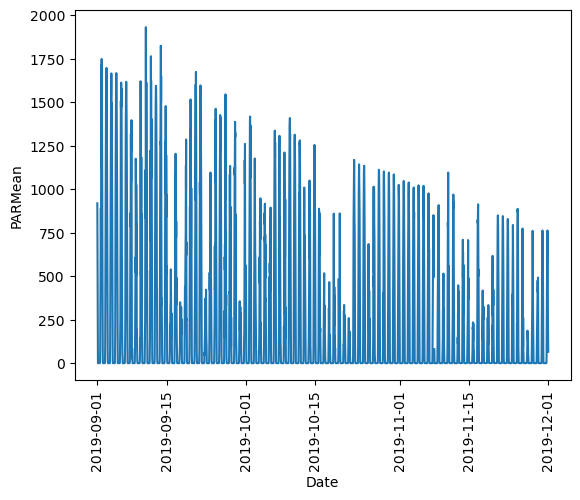

In [5]:
par30top = par30[par30.verticalPosition=="080"]
fig, ax = plt.subplots()
ax.plot(par30top.endDateTime, par30top.PARMean)
plt.ylabel('PARMean'); plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

Looks good! The sun comes up and goes down every day, and some days are cloudy.

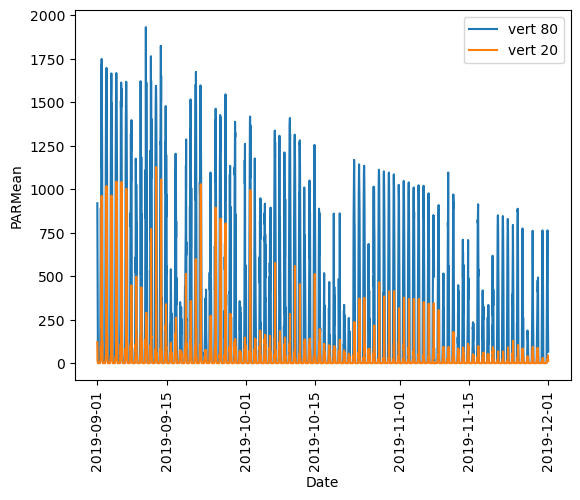

In [6]:
par30low = par30[par30.verticalPosition=="020"]
fig, ax = plt.subplots()
ax.plot(par30top.endDateTime, par30top.PARMean,label='vert 80')
ax.plot(par30low.endDateTime, par30low.PARMean,label='vert 20')
plt.ylabel('PARMean'); plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend()
plt.show()

We can see there is a lot of light attenuation through the canopy.

## Download observational (OS) data

To explore observational data, we’ll download aquatic plant chemistry data (DP1.20063.001) from three lake sites: Prairie Lake (PRLA), Suggs Lake (SUGG), and Toolik Lake (TOOK). We will use the `nu.load_by_product` function as we did before, with the PAR data.

In [7]:
apchem = nu.load_by_product(dpid="DP1.20063.001", 
                  site=["PRLA", "SUGG", "TOOK"], 
                  package="expanded",
                  release="RELEASE-2024",
                  check_size=False)

Finding available files
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:34<00:00,  1.25s/it]
C:\Users\bhass\Documents\GitHubRepos\NEON-utilities-python\src\neonutilities\unzip_and_stack.py:141: UserWarning: Filepaths on Windows are limited to 260 characters. Attempting to extract a filepath that is > 260 characters long. Move your working or savepath directory closer to the root directory or enable long path support in Windows.
  warnings.warn(
Stacking data files
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.01it/s]


## Navigate data downloads: OS
As we saw above, the object returned by `load_by_product` is a dictionary containing a number of keys. Let’s check out what’s the same and what’s different from the IS data tables.

### Explore data tables
As with the sensor data, we have some data tables and some metadata tables. Most of the metadata files are the same as the sensor data: readme, variables, issueLog, and citation. These files contain the same type of metadata here that they did in the IS data product. Let’s look at the other files:

- `apl_clipHarvest`: Data from the clip harvest collection of aquatic plants
- `apl_biomass`: Biomass data from the collected plants
- `apl_plantExternalLabDataPerSample`: Chemistry data from the collected plants
- `apl_plantExternalLabQA`: Quality assurance data from the chemistry analyses
- `asi_externalLabPOMSummaryData`: Quality metrics from the chemistry lab
- `validation_20063`: For observational data, a major method for ensuring data quality is to control data entry. This file contains information about the data ingest rules applied to each input data field.
- `categoricalCodes_20063`: Definitions of each value for categorical data, such as growth form and sample condition

Let's take a look at all the variables we've loaded so far using the `%whos` magic command:

In [ ]:
%whos

You can work with the apchem tables from the dictionary object, but many people find it easier to extract each table from the dictionary and work with each as an independent object. To do this use `globals().update()` as follows:

In [8]:
globals().update(apchem)

You can then see the new variables using the `%whos` magic command.

In [ ]:
%whos

### Explore isotope data
To get started with the aquatic plant chemistry data, let’s take a look at carbon isotope ratios in plants across the three sites we downloaded. The chemical analytes are reported in the apl_plantExternalLabDataPerSample table, and the table is in long format, with one record per sample per analyte, so we’ll subset to only the carbon isotope analyte:

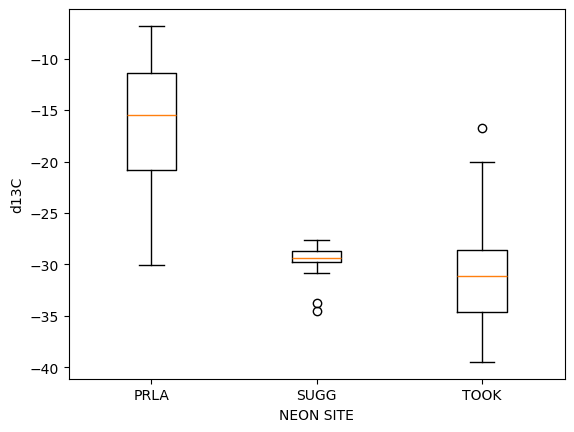

In [9]:
apl13C = apl_plantExternalLabDataPerSample[
         apl_plantExternalLabDataPerSample.analyte=="d13C"]
grouped = apl13C.groupby("siteID")["analyteConcentration"]
fig, ax = plt.subplots()
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys());
plt.ylabel('d13C'); plt.xlabel('NEON SITE');

We see that aquatic plants at Suggs and Toolik are quite low in 13C, with more spread at Toolik than Suggs, and plants at Prairie Lake are relatively enriched. Clearly the next question is what species these data represent. But taxonomic data aren’t present in the `apl_plantExternalLabDataPerSample` table, they’re in the `apl_biomass` table. We’ll need to join the two tables to get chemistry by taxon.

Every NEON data product has a Quick Start Guide (QSG), and for OS products it includes a section describing how to join the tables in the data product. Since it’s a pdf file, loadByProduct() doesn’t bring it in, but you can view the Aquatic plant chemistry QSG on the Product Details page. In R, the `neonOS` package uses the information from the QSGs to provide an automated table-joining function, joinTableNEON(). There is not yet an equivalent to the neonOS package in Python, so we will code the table join manually, based on the info in the Quick Start Guide:

In [10]:
apct = pd.merge(apl_biomass, 
            apl_plantExternalLabDataPerSample,
            left_on=["siteID", "chemSubsampleID"],
            right_on=["siteID", "sampleID"],
            how="outer")

Using the merged data, now we can plot carbon isotope ratio for each taxon.

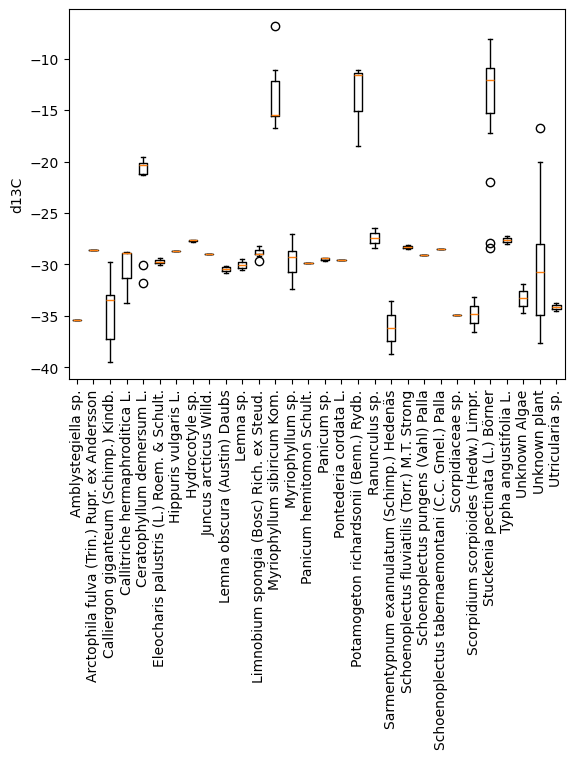

In [11]:
apl13Cspp = apct[apct.analyte=="d13C"]
grouped = apl13Cspp.groupby("scientificName")["analyteConcentration"]
fig, ax = plt.subplots()
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys());
plt.xticks(rotation=90); plt.ylabel('d13C');

We can see most of the sampled plants have carbon isotope ratios around -30, with just a few species accounting for most of the more enriched samples. Why might some of these plants be enriched? This is something you may wish to explore on your own, looking at the Ceratophyllum demersum (hornwort), Myriophyllum sibiricum Kom (milfoil), Potamogeton richardsonii (Benn.) Rydb (Richardson's pondweed), and Stuckenia pectinata L Borner (Sago pondweed). In terrestrial plants, carbon enrichment is often related to the photosynthetic pathway (e.g. C3 v. C4), but there are often different mechanisms that come up with aquatic plants.

## Download remote sensing (AOP) data

Remote sensing data files are very large, so downloading them can take a long time. `by_file_aop` and `by_tile_aop` enable easier programmatic downloads, but be aware it can take a very long time to download large amounts of data. To see the inputs for these functions, type `nu.by_file_aop?` or `nu.by_tile_aop?`, e.g.

In [ ]:
nu.by_tile_aop?

You can see what years of data are available for a given site using nu.list_available_dates as follows:

In [12]:
nu.list_available_dates('DP3.30015.001','WREF')

PROVISIONAL Available Dates: 2025-07
RELEASE-2025 Available Dates: 2017-06, 2018-07, 2019-07, 2021-07, 2023-06


In [ ]:
You can also see the spatial extent of the data using nu.get_aop_tile_extents:

In [13]:
wref2017_ext = nu.get_aop_tile_extents('DP3.30015.001','WREF','2017')

Easting Bounds: (570000, 594000)
Northing Bounds: (5070000, 5082000)


To display the UTM x_y coordinates of all the tiles you can print(wref2017_ext). This will be a long list, so we'll skip for now. Next let's download a single tile of AOP data at the WREF site for a given UTM easting and northing as follows:

In [14]:
# specify the download directory:
download_dir = os.path.expanduser("~\\Downloads")

# download an AOP CHM tile
nu.by_tile_aop(dpid="DP3.30015.001",
               site="WREF", 
               year=2017,
               easting=580000, 
               northing=5075000, 
               savepath=download_dir)

Provisional NEON data are not included. To download provisional data, use input parameter include_provisional=True.


Continuing will download 7 NEON data files totaling approximately 3.9 MB. Do you want to proceed? (y/n)  y


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.53it/s]


## Navigate data downloads: AOP
To work with AOP data, the best bet in R is the terra package. It has functionality for most analyses you might want to do. In Python, we’ll use the rasterio package here; explore NEON remote sensing tutorials for more guidance.

First let’s find where the tile we downloaded ended up. You can explore in your file explorer, or sleuth around in Python as follows:

In [ ]:
chm_dir = os.path.join(download_dir,'DP3.30015.001')
for root, dirs, files in os.walk(chm_dir):
    for file in files:
        # check only .tif files
        if file.endswith('.tif'):
            print(os.path.join(root,file))

In [15]:
chm_file = os.path.expanduser("~/Downloads/DP3.30015.001/neon-aop-products/2017/FullSite/D16/2017_WREF_1/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D16_WREF_DP3_580000_5075000_CHM.tif")
# chm = rasterio.open(chm_file) optionally read in the chm file as a rasterio object

Let's plot the data using `show`, imported from `rasterio.plot`:

CPLE_AppDefined in PROJ: proj_create_from_database: C:\Users\bhass\Anaconda3\Library\share\proj\proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
CPLE_AppDefined in The definition of projected CRS EPSG:32610 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.


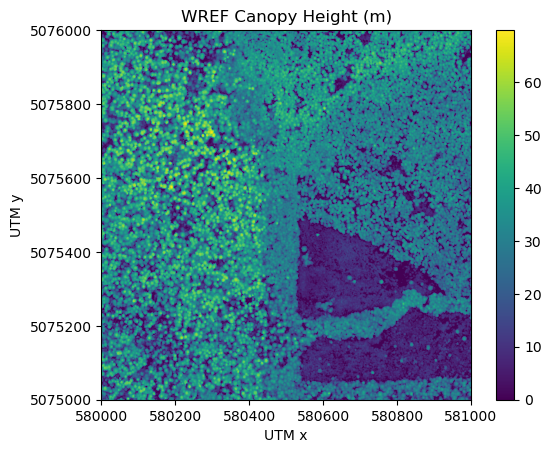

In [16]:
# Open the CHM raster and plot, including a colorbar and some additional formatting options
with rasterio.open(chm_file) as src:
    fig, ax = plt.subplots(1, 1)
    chm_plot = show(src, ax=ax, cmap='viridis')
    im = chm_plot.get_images()[0]
    fig.colorbar(im, ax=ax)

    # Disable scientific notation on the y-axis
    ax.ticklabel_format(axis='y', style='plain')

    plt.title("WREF Canopy Height (m)")
    plt.xlabel("UTM x")
    plt.ylabel("UTM y")
    plt.show()

Now we can see canopy height across the downloaded tile; the tallest trees are over 60 meters, not surprising in the Pacific Northwest. There is a clearing or clear cut in the lower right quadrant.

## Next steps
Now that you’ve learned the basics of downloading and understanding NEON data, where should you go to learn more? There are many more NEON tutorials to explore, including how to align remote sensing and ground-based measurements, a deep dive into the data quality flagging in the sensor data products, and much more. For a recommended suite of tutorials for new users, check out the Getting Started with NEON Data tutorial series.